In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [451]:
df = pd.read_table('log.intEnergy')
df.head()

,units metal
0,dimension 3
1,boundary p p p
2,atom_style atomic
3,#atom_modify map array
4,#----------------- CREATE ATOMS --------------...


In [452]:
fileName = "log.intEnergy"
runNum = 1

search = "Step"
n = 1
f = open(fileName)
df = {}
EOF = False
while True:
    try:
        line = f.readline()
    except:
        break
    if search in line:
        if n == runNum:
            keys = line.split()
            for key in keys:
                df[key] = []
            while True:
                try:
                    line = f.readline()
                except:
                    EOF = True
                    break
                try:
                    values = list(float(x) for x in line.split())
                except:
                    break
                for i in range(len(keys)):
                    df[keys[i]].append(values[i])
        else:
            n += 1
    else:
        pass
    if len(df.keys()) > 0 or EOF:
        break
df = pd.DataFrame(df)
f.close()
print(df)

     Step   Atoms  Temp        Press     TotEng
0     0.0  1000.0   0.0  483301.7600  6735.7472
1    10.0  1000.0   0.0  276829.1900 -1073.9019
2    20.0  1000.0   0.0   83330.9460 -3020.4938
3    30.0  1000.0   0.0   12677.0130 -3405.8900
4    40.0  1000.0   0.0   -5672.5086 -3497.4805
5    50.0  1000.0   0.0  -11162.4960 -3534.2188
6    60.0  1000.0   0.0  -13136.4520 -3556.2353
7    70.0  1000.0   0.0  -13255.2920 -3568.1140
8    80.0  1000.0   0.0  -13306.9930 -3573.9639
9    90.0  1000.0   0.0  -13395.1410 -3577.7530
10  100.0  1000.0   0.0  -13288.4860 -3580.5411
11  110.0  1000.0   0.0  -13001.3210 -3583.3099
12  120.0  1000.0   0.0  -12648.7040 -3585.8899
13  130.0  1000.0   0.0  -12502.6500 -3587.8837
14  140.0  1000.0   0.0  -12527.8160 -3589.4540
15  150.0  1000.0   0.0  -12420.8330 -3590.0296
16  160.0  1000.0   0.0  -11618.9710 -3590.6104
17  170.0  1000.0   0.0  -11975.6950 -3591.4966
18  180.0  1000.0   0.0  -11925.0600 -3592.1150
19  190.0  1000.0   0.0  -11943.1860 -35

# Working Log file Reader 

test code for class


In [453]:
filename = 'log.intEnergy'   #takes in filename
thermoLabels = 'Step Atoms Temp Press TotEng'.split()    #take in thermo output Labels/arguements
includeLabelsForNewRun = False

dataLines = []

f = open(filename,'r')
data = False
for line in f.readlines():
    #print(line.split())
    
    if data:
        if len(line.split())!= 0 and line.split()[0].isdigit():
            dataLines.append(line.split())
        else:
            data = False
    
    if line.split() == thermoLabels:
        data = True
        if includeLabelsForNewRun:
            dataLines.append(line.split())
    
f.close()

for i in dataLines:
    print(i)

#print(outputLabels)

['0', '1000', '0', '483301.76', '6735.7472']
['10', '1000', '0', '276829.19', '-1073.9019']
['20', '1000', '0', '83330.946', '-3020.4938']
['30', '1000', '0', '12677.013', '-3405.89']
['40', '1000', '0', '-5672.5086', '-3497.4805']
['50', '1000', '0', '-11162.496', '-3534.2188']
['60', '1000', '0', '-13136.452', '-3556.2353']
['70', '1000', '0', '-13255.292', '-3568.114']
['80', '1000', '0', '-13306.993', '-3573.9639']
['90', '1000', '0', '-13395.141', '-3577.753']
['100', '1000', '0', '-13288.486', '-3580.5411']
['110', '1000', '0', '-13001.321', '-3583.3099']
['120', '1000', '0', '-12648.704', '-3585.8899']
['130', '1000', '0', '-12502.65', '-3587.8837']
['140', '1000', '0', '-12527.816', '-3589.454']
['150', '1000', '0', '-12420.833', '-3590.0296']
['160', '1000', '0', '-11618.971', '-3590.6104']
['170', '1000', '0', '-11975.695', '-3591.4966']
['180', '1000', '0', '-11925.06', '-3592.115']
['190', '1000', '0', '-11943.186', '-3592.254']
['200', '1000', '0', '-12032.425', '-3592.308

In [454]:
df = pd.DataFrame(dataLines,columns=thermoLabels)
#print(df)

Actual Reader Class

In [455]:
class LogReader:
    def __init__(self,filename,thermoLabels):
        self.var = "holder"
        self.filename = filename
        self.thermoLabels = thermoLabels.split()
    
    # get lines of thermo output data as list of lines
    def dataExtracter(self,includeLabelsForNewRun=False):
        self.includeLabelsForNewRun = includeLabelsForNewRun

        dataLines = []
        
        f = open(filename,'r')
        isDataLine = False
        for line in f.readlines():
            if isDataLine:
                if len(line.split())!= 0 and line.split()[0].isdigit():
                    dataLines.append(line.split())
                else:
                    isDataLine = False
            
            if line.split() == self.thermoLabels:
                isDataLine = True
                if includeLabelsForNewRun:     #used to seperate runs by thermoLabels
                    dataLines.append(line.split())

        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataFrame(self,seperateRunsByThermoLabels=False):
        return pd.DataFrame(self.dataExtracter(seperateRunsByThermoLabels),columns=self.thermoLabels)

In [456]:
reader = LogReader('log.Bulkmod','Step Atoms Temp Press TotEng')
df = reader.getDataFrame()
print(reader.getDataFrame())

       Step Atoms       Temp       Press      TotEng
0         0  1000          0   483301.76   6735.7472
1        10  1000          0   276829.19  -1073.9019
2        20  1000          0   83330.946  -3020.4938
3        30  1000          0   12677.013    -3405.89
4        40  1000          0  -5672.5086  -3497.4805
5        50  1000          0  -11162.496  -3534.2188
6        60  1000          0  -13136.452  -3556.2353
7        70  1000          0  -13255.292   -3568.114
8        80  1000          0  -13306.993  -3573.9639
9        90  1000          0  -13395.141   -3577.753
10      100  1000          0  -13288.486  -3580.5411
11      110  1000          0  -13001.321  -3583.3099
12      120  1000          0  -12648.704  -3585.8899
13      130  1000          0   -12502.65  -3587.8837
14      140  1000          0  -12527.816   -3589.454
15      150  1000          0  -12420.833  -3590.0296
16      160  1000          0  -11618.971  -3590.6104
17      170  1000          0  -11975.695  -359

# Working Grapher

In [457]:
import numpy as np
import matplotlib.pyplot as plt

#collection of methods that analyze dataframe data
class LogAnalyzer:
    def __init__(self,dataframe,timestep=1):
        self.df = dataframe
        self.timestep = timestep
        
    def generalPlot(self,X,Y,xlabel='',ylabel='',title=''):
        plt.plot(X,Y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.legend(loc='upper left')
        plt.grid()
        plt.show()
        
    def plotColumn(self,columnLabel):
        Y = self.df[columnLabel].values.astype(float)
        X = np.linspace(0,self.timestep*len(Y),len(Y))
        self.generalPlot(X,Y,'Runtime',columnLabel)

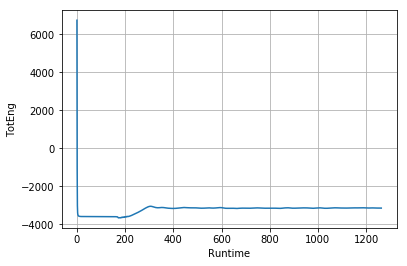

In [458]:
LA = LogAnalyzer(df)
LA.plotColumn('TotEng')


# Reading position vectors from dump files; Working DumpReader class



#implementation assumes that atom ids are in same order for each run, seems to be the case need to confirm 

In [459]:

class DumpReader:
    def __init__(self,filename, outputLabels = ''):
        self.filename = filename
        self.outputLabels = ('ITEM: ATOMS '+ outputLabels).split()
    
    def dataExtracter(self):
        dataLines = []         # format : [[rowData1], [rowData2], [rowData3], ... ]
        self.idLabels = ['Timestep']      # format : ['Timestep', 'atomID', 'atomID', ... ]
        rowData = []                      # format : [[timestep], [x,y,z], [x,y,z], ... ]
        
        f = open(self.filename,'r')
        isFirstRun = True
        isDataLine = False          # when initially set, line in next iteration is a data line
        isTimestepLine = False      # when initially set, line in next iteration is a timestep line
        timestep = 0
        
        for line in f.readlines():  
            if line.strip() == 'ITEM: TIMESTEP' or isTimestepLine:
                if isTimestepLine:
                    isTimestepLine = False
                    timestep = int(line.split()[0])
                    rowData.append([timestep])
                    if timestep > 0:                 #assumes simulation starts at 0 timestep
                        isFirstRun = False
                else:
                    isTimestepLine = True
            
            if isDataLine:  
                data = line.split()
                if len(line.split())!= 0 and data[0].isdigit():   
                    if isFirstRun: 
                        self.idLabels.append(data[0])   # append label
                    rowData.append(line.split()[1:])   
                else:
                    isDataLine = False
                    dataLines.append(rowData)
                    rowData = []
            
            if line.split() == self.outputLabels:    
                isDataLine = True                     
                
        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataframe(self):
        return pd.DataFrame(self.dataExtracter(),columns=self.idLabels)
    
    def getNdArray(self):
        data = self.dataExtracter()
        for row in range(len(data)):
            #data[row] = np.array(data[row])
            for col in range(len(data[row])):
                data[row][col] = np.array(data[row][col]).astype(float)
        return np.array(data)
'''
note, tried to build dataLines as np.array but since i consistently appending new data to rowData i 
have to make a new copy and reassign (very wasteful) 
instead trying building dataLines then converting elements to np.array by looping, (is there a more efficient
way to do this?)

'''


'\nnote, tried to build dataLines as np.array but since i consistently appending new data to rowData i \nhave to make a new copy and reassign (very wasteful) \ninstead trying building dataLines then converting elements to np.array by looping, (is there a more efficient\nway to do this?)\n\n'

code for testing/proof of concept 

In [460]:
names = ['Timestep','1r','2r','3r']
a = [[[10],[1,2,3],[1,2,3],[1,2,3]],
         [[20],[1,2,3],[1,2,3],[1,2,3]],
         [[30],[1,2,3],[1,2,3],[1,2,3]],
         [[40],[1,2,3],[1,2,3],[1,2,3]]]
ar = np.array([[[10],[1,2,3],[1,2,3],[1,2,3]],
         [[20],[1,2,3],[1,2,3],[1,2,3]],
         [[30],[1,2,3],[1,2,3],[1,2,3]],
         [[40],[1,2,3],[1,2,3],[1,2,3]]])
pd.DataFrame(ar,columns = names)

ar2 = np.array([])

for row in a:
    r = np.array([])
    for elem in row:
        np.append(r,np.array(elem))
        
    np.append(ar2,r)



In [461]:
#outputLabels = 'id x y z'
DR = DumpReader('pos.XYZ','id x y z')
print(DR.getDataframe())


     Timestep                                     1  \
0         [0]                             [0, 0, 0]   
1        [10]  [-0.000209224, 0.000245723, 18.1499]   
2        [20]   [-0.000563972, 0.00190264, 18.1496]   
3        [30]   [0.0172965, 0.00188854, 0.00826346]   
4        [40]       [0.0703753, 18.1423, 0.0242443]   
5        [50]        [0.131341, 18.1365, 0.0342203]   
6        [60]        [0.204451, 18.1334, 0.0382077]   
7        [70]        [0.239797, 18.1326, 0.0390822]   
8        [80]         [0.250693, 18.1316, 0.039122]   
9        [90]        [0.250235, 18.1314, 0.0392713]   
10      [100]        [0.250003, 18.1315, 0.0392886]   
11      [110]        [0.250016, 18.1315, 0.0392841]   
12      [120]        [0.250013, 18.1315, 0.0392814]   
13      [130]        [0.250021, 18.1315, 0.0392803]   
14      [140]        [0.250017, 18.1315, 0.0392819]   
15      [150]        [0.250019, 18.1315, 0.0392819]   
16      [160]        [0.250017, 18.1315, 0.0392823]   
17      [1

# Edditable DumpReader2 class to implemented data extraction using ndarrays


In [462]:

class DumpReader2:
    def __init__(self,filename, outputLabels = ''):
        self.filename = filename
        self.outputLabels = ('ITEM: ATOMS '+ outputLabels).split()
    
    def dataExtracter(self):
        dataLines = []         # format : [[rowData1], [rowData2], [rowData3], ... ]
        self.idLabels = ['Timestep']      # format : ['Timestep', 'atomID', 'atomID', ... ]
        rowData = []                      # format : [[timestep], [x,y,z], [x,y,z], ... ]
        
        f = open(self.filename,'r')
        isFirstRun = True
        isDataLine = False          # when initially set, line in next iteration is a data line
        isTimestepLine = False      # when initially set, line in next iteration is a timestep line
        timestep = 0
        
        for line in f.readlines():  
            if line.strip() == 'ITEM: TIMESTEP' or isTimestepLine:
                if isTimestepLine:
                    isTimestepLine = False
                    timestep = int(line.split()[0])
                    rowData.append([timestep])
                    if timestep > 0:                 #assumes simulation starts at 0 timestep
                        isFirstRun = False
                else:
                    isTimestepLine = True
            
            if isDataLine:  
                data = line.split()
                if len(line.split())!= 0 and data[0].isdigit():   
                    if isFirstRun: 
                        self.idLabels.append(data[0])   # append label
                    rowData.append(line.split()[1:])   
                else:
                    isDataLine = False
                    dataLines.append(rowData)
                    rowData = []
            
            if line.split() == self.outputLabels:    
                isDataLine = True                     
                
        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataframe(self):
        return pd.DataFrame(self.dataExtracter(),columns=self.idLabels)
    
    def getNdArray(self):
        return self.dataExtracter()
        



In [463]:
r = [[1],[1,2,3],[1,2,3]]
a = np.empty(0)
a = np.append(a,np.array([1,2,3]))
b = np.asarray(r)
for i in range(len(b)):
    b[i] = np.array(b[0])
    
print(b)

[array([1]) array([1]) array([1])]


# Function to check for convergence of data to a certain value; method of DataFileAnalyzer class


In [464]:
    import copy 
    
    def getConstValueList(self,columnLabel):
        yData = np.array(self.df[columnLabel].tolist())   # GET COLUMN DATA AS TARGET NDARRAY
        yGradient = np.gradient(yData)
        print(yGradient)
        
        
        #how to decide maxError?, minRange?
        
    def getConstValueList2(df,columnLabel,timestepInterval=10,maxError=1,minRange=50):
        #thermo data is outputedevrey timestepInterval
        
        yData = np.array(df[columnLabel].tolist()).astype(float)   # GET COLUMN DATA AS TARGET NDARRAY
        #plt.plot(yData)
        yGradient = np.gradient(yData)     # timestep is conserved
        plt.plot(yGradient[20:])
        yGGradient = np.gradient(yGradient)   # timestep is conserved
        plt.plot(yGGradient[20:])
        
        #print(yData.shape,'   ',yGradient.shape,'   ',yGGradient.shape)
        
        constValueRanges= []
        
        lowRange, uppRange = -1, -1    # -1 means var is not set
        

        for ind in range(yGGradient.shape[0]):
            #print(ind,' ',yGGradient[ind], " low: ",lowRange," upp: ",uppRange,' cond: ',(uppRange == -1) and abs(yGradient[ind]) < maxError)
            if lowRange != -1 and abs(yGGradient[ind]) < maxError:  # if lowRange is set, then can set uppRnge
                uppRange = ind
                if ind == (yGGradient.shape[0]-1):
                    constValueRanges.append([lowRange,uppRange])
            elif lowRange != -1 and uppRange != -1:
                if abs(uppRange-lowRange) > minRange:
                    #print(ind,' ',yGradient[ind], " low: ",lowRange," upp: ",uppRange)
                    constValueRanges.append([lowRange,uppRange])
                lowRange = -1
                uppRange = -1   
                
            
            if (uppRange == -1):       # if uppRange is not set then can set lowRange
                lowRange = ind
        
        print(constValueRanges)
        return constValueRanges
    
# energy = np.mean(yData[constValueRange[0],constValueRange[1]])
        
    
       
        

In [465]:
 yData = np.array(df['TotEng'].tolist()).astype(float)

# have to find a decent way to find max Error (and alittle, but its fine rn,the min Range value)
def getConstValueList3(df,columnLabel,timestepInterval=10,maxError=1,minRange=10):
        #thermo data is outputedevrey timestepInterval
        
        yData = np.array(df[columnLabel].tolist()).astype(float)   # GET COLUMN DATA AS TARGET NDARRAY
        #plt.plot(yData)
        yGradient = np.gradient(yData)     # timestep is conserved
        #plt.plot(yGradient[20:])
        yGGradient = np.gradient(yGradient)   # timestep is conserved
        #plt.plot(yGGradient[20:])
        
        #print(yData.shape,'   ',yGradient.shape,'   ',yGGradient.shape)
        
        constValueRanges= []
        
        lowRange, uppRange = -1, -1    # -1 means var is not set
        

        for ind in range(yGGradient.shape[0]):
            #print(ind,' ',yGGradient[ind], " low: ",lowRange," upp: ",uppRange,' cond: ',(uppRange == -1) and abs(yGradient[ind]) < maxError)
            if lowRange != -1 and abs(yGGradient[ind]) < maxError:  # if lowRange is set, then can set uppRnge
                uppRange = ind
                if ind == (yGGradient.shape[0]-1):
                    constValueRanges.append([lowRange,uppRange])
            elif lowRange != -1 and uppRange != -1:
                if abs(uppRange-lowRange) > minRange and np.mean(yGradient[lowRange:uppRange])<maxError:
                    #print(ind,' ',yGradient[ind], " low: ",lowRange," upp: ",uppRange)
                    constValueRanges.append([lowRange,uppRange])
                lowRange = -1
                uppRange = -1   
                
            
            if (uppRange == -1):       # if uppRange is not set then can set lowRange
                lowRange = ind
                
                
        #STD ANALYSIS
        yStd =[]
        for ind in range(yData.shape[0]):
            if ind == 0 or ind == 1:
                yStd.append(np.std([yData[ind],yData[ind+1]]))
            elif ind == yData.shape[0]-1 or ind == yData.shape[0]-2:
                yStd.append(np.std([yData[ind],yData[ind-1]]))
            else:
                yStd.append(np.std([yData[ind-2],yData[ind-1],yData[ind],yData[ind+1],yData[ind-2]]))
        plt.plot(yStd[10:])
            
            
        
        print(constValueRanges)
        
        
        
        return constValueRanges

[[9, 160], [263, 1262]]


"\nyData = np.array(df['TotEng'].tolist()).astype(float)[10:]\n\nsubData = []\nfor rang in lst:\n    subData.append(yData[rang[0]:rang[1]+1])\n    \nfor subD in subData:\n    abc = getConstValueList2(pd.DataFrame(subD,columns=['ySubData']),'ySubData')\n    #dftest = pd.DataFrame(subD,columns=['ySubData'])\n    #print(dftest['ySubData'])\n    print()\n"

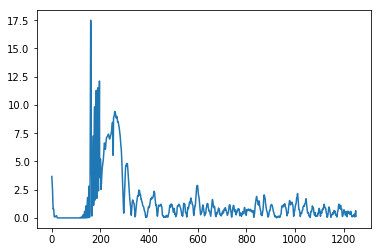

In [466]:
lst = getConstValueList3(df,'TotEng')

'''
yData = np.array(df['TotEng'].tolist()).astype(float)[10:]

subData = []
for rang in lst:
    subData.append(yData[rang[0]:rang[1]+1])
    
for subD in subData:
    abc = getConstValueList2(pd.DataFrame(subD,columns=['ySubData']),'ySubData')
    #dftest = pd.DataFrame(subD,columns=['ySubData'])
    #print(dftest['ySubData'])
    print()
'''

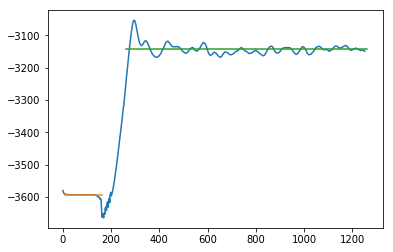

In [467]:
yData = np.array(df['TotEng'].tolist()).astype(float)[10:]   # GET COLUMN DATA AS TARGET NDARRAY
plt.plot(yData)

#lst.append([11,146])

for rang in lst:
    y=np.ones(rang[1]-rang[0]+1)*np.mean(yData[rang[0]:rang[1]])
    plt.plot(np.arange(rang[0],rang[1]+1),y)
    #print(y)


(1253,) (1253,) (1, 1253) (1253,) (1252,) (2, 626) (626,)


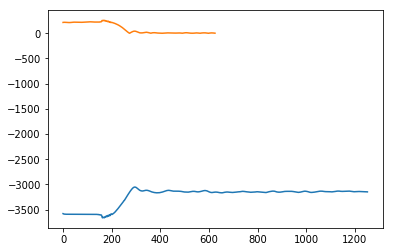

In [476]:
#Y is vector of data

dataBin = 1 #ORANGE
binDivisibleY = yData[yData.shape[0]%dataBin:]

binnedY = binDivisibleY[None,:].reshape(dataBin,int(binDivisibleY.shape[0]/dataBin)) #binned data is along column
meanBinnedY = np.mean(binnedY,axis=0)

stdBin = 2 #GREENE
binDivisibleMeanY = meanBinnedY[meanBinnedY.shape[0]%stdBin:]
binnedMeanY = binDivisibleMeanY[None,:].reshape(stdBin,int(binDivisibleMeanY.shape[0]/stdBin)) #binned data is along column
stdBinnedMeanY = np.std(binnedMeanY,axis=0)

print(yData.shape,binDivisibleY.shape,binnedY.shape,meanBinnedY.shape, binDivisibleMeanY.shape,binnedMeanY.shape,stdBinnedMeanY.shape)

#plt.plot(yData)
plt.plot(meanBinnedY)
plt.plot(stdBinnedMeanY)
              

